# test .ContinuoustoCategory


## General

In [2]:
__author__ = 'BruceCottman'
__license__ = 'MIT License'
__author__,__license__

('BruceCottman', 'MIT License')

In [3]:
import pdb

In [4]:
!conda list

# packages in environment at /Users/brucecottman/anaconda3/envs/paso:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
absl-py                   0.7.0                    pypi_0    pypi
alabaster                 0.7.12                   py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.6                    py37_0  
anaconda-project          0.8.2                    py37_0  
appnope                   0.1.0                    py37_0  
appscript                 1.0.1            py37h1de35cc_1  
asn1crypto                0.24.0                   py37_0  
astor                     0.7.1                    pypi_0    pypi
astroid                   2.1.0                    py37_0  
astropy                   3.1              py37h1de35cc_0  
atomicwrites              1.2.1                    py37_0  
attrdict                  2.0.1                    pypi_0    pypi
att

## imports

### general

In [5]:
import os,sys
sys.path

['/Users/brucecottman/Documents/PROJECTS/paso/tests/pre',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python37.zip',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/lib-dynload',
 '',
 '/Users/brucecottman/.local/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/aeosa',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/IPython/extensions',
 '/Users/brucecottman/.ipython']

In [5]:
#_file__ = !cd ../../;pwd
#__file__ = __file__[0]
#__file__

'/Users/brucecottman/Documents/PROJECTS/paso'

In [6]:
#sys.path.append(__file__)
#sys.path

['/Users/brucecottman/Documents/PROJECTS/paso/tests/pre',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python37.zip',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/lib-dynload',
 '',
 '/Users/brucecottman/.local/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/aeosa',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/IPython/extensions',
 '/Users/brucecottman/.ipython',
 '/Users/brucecottman/Documents/PROJECTS/paso']

In [6]:
import copy, random, math
import pandas as pd
import numpy as np
from tqdm import tqdm
import joblib, traceback


In [7]:
from __future__ import print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import probscale
import seaborn as sns
from scipy.stats import probplot
import statsmodels.api as sm

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
from sklearn.model_selection import train_test_split
import sklearn_pandas 
from pandas_summary import DataFrameSummary

### paso imports

In [10]:
from paso.base import __PiPeLiNeS__
from paso.base import get_paso_log,pasoLine
from paso.base import toDataFrame
from paso.base import dask_pandas_ratio
#from paso.pre.toCategory import toCategory
from paso.pre.ContinuoustoCategory import ContinuoustoCategory,_Check_No_NA_Values,_Check_No_NA_Values,_fixed_width_labels
from paso.pre.toDatetimeComponents import toDatetimeComponents
from paso.pre.EliminateUnviableFeatures import EliminateUnviableFeatures

ModuleNotFoundError: No module named 'paso.pre'

## Start pipeline

In [10]:
import logging
logger = logging.getLogger('paso')
logger.setLevel('DEBUG'.upper())
logger

<Logger paso (DEBUG)>

paso.2019-04-11.18:22:50.pasoLine: Read parameter file../../lessons/parameters/lesson.1.yaml
paso.2019-04-11.18:22:50.It lives!!!!


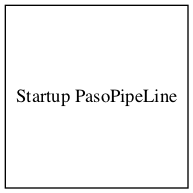

<Logger paso (DEBUG)>

In [11]:
#call only oncea
Pipe = pasoLine(parameter_filepath='../../lessons/parameters/lesson.1.yaml',log_name='paso')
logger = Pipe.startup().log
logger.setLevel('DEBUG'.upper())
logger.getEffectiveLevel()
logger.info('It lives!!!!')
Pipe.display_DAG()
Pipe.log

### test pasoLine facilities

#### logging

In [12]:
# call as nmany times as you like
logger.info('It lives!!!!')
logger.info('It lives again!!!!')
logger.info('DIE')

paso.2019-04-11.18:22:51.It lives!!!!
paso.2019-04-11.18:22:51.It lives again!!!!
paso.2019-04-11.18:22:51.DIE


#### parmeters

In [13]:
d = Pipe.parameters
for k in d.keys():
    print(k,':',d[k])

project : bhcottman/lesson.1
name : lesson 1
model-methods : ['log', 'parameters', 'save', 'load', 'read', 'write', 'train', 'predict', 'inverse-predict']
function-methods : ['log', 'parameters', 'read', 'write', 'transform']
train__path : /Users/brucecottman/Documents/Kaggle/08222018.open-solution-salt-detection/input/train/images
valid_path : /Users/brucecottman/Documents/Kaggle/08222018.open-solution-salt-detection/input/images
test_path : /Users/brucecottman/Documents/Kaggle/08222018.open-solution-salt-detection/input/train/masks
models_path : /Users/brucecottman/Documents/Kaggle/08222018.open-solution-salt-detection/input/depths.csv
tmp_path : /Users/brucecottman/Documents/Kaggle/08222018.open-solution-salt-detection/input/submissions
cpu_n : 12
threads_n : 24
gpu_n : 2
cv_n : 5
shuffle : 1


## Input  Datasets

### pydataset

Start with importing data():

* from pydataset import data
* To load a dataset:
* `titanic = data('titanic') `

* To display the documentation of a dataset:
* `data('titanic', show_doc=True)`
* To see the available datasets:
* `data()`

In [14]:
from pydataset import data
df_data = data()
df_data

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
5,InsectSprays,Effectiveness of Insect Sprays
6,JohnsonJohnson,Quarterly Earnings per Johnson & Johnson Share
7,LakeHuron,Level of Lake Huron 1875-1972
8,LifeCycleSavings,Intercountry Life-Cycle Savings Data
9,Nile,Flow of the River Nile


In [15]:
titanic = data('titanic')
display(titanic)

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
6,1st class,adults,man,yes
7,1st class,adults,man,yes
8,1st class,adults,man,yes
9,1st class,adults,man,yes
10,1st class,adults,man,yes


### mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


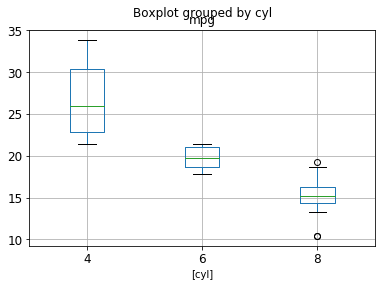

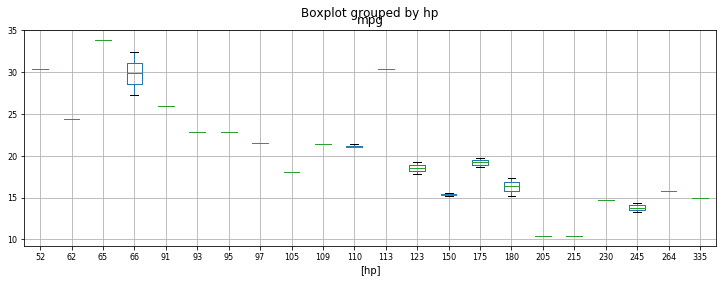

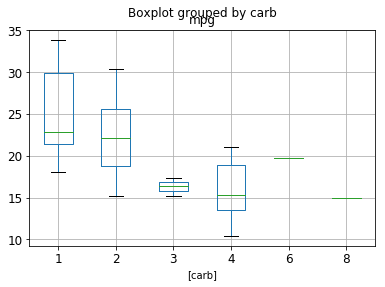

In [16]:
mtcars = data('mtcars')
display(mtcars)
mtcars[['mpg','cyl']].boxplot(by = 'cyl',fontsize=12,figsize=(6,4))
mtcars[['mpg','hp']].boxplot(by = 'hp',fontsize=8,figsize=(12,4))
mtcars[['mpg','carb']].boxplot(by = 'carb',fontsize=12,figsize=(6,4))

### presidents

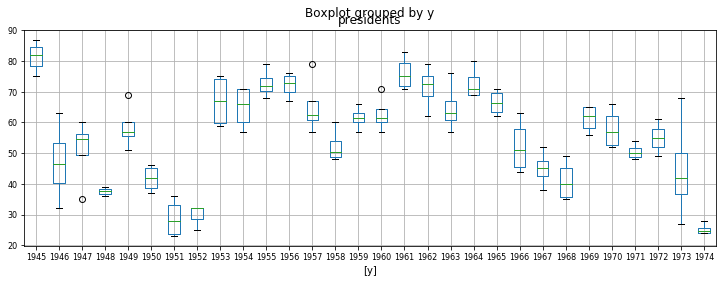

In [17]:
presidents = data('presidents')
presidents['m'] = round((presidents['time'] % 1)*12).astype(np.int)
presidents['y'] = presidents['time'].astype(np.int)
presidents[['y','presidents']].boxplot(by = 'y',fontsize=8,figsize=(12,4))


In [18]:
presidents.head(5)

,time,presidents,m,y
1,1945.00,NaN,0,1945
2,1945.25,87.0,3,1945
3,1945.50,82.0,6,1945
4,1945.75,75.0,9,1945
5,1946.00,63.0,0,1946


### UKDriverDeaths

In [19]:
# float, integer
UKDriverDeaths = data('UKDriverDeaths')
UKDriverDeaths['m'] = round((UKDriverDeaths['time'] % 1)*12).astype(np.int)
UKDriverDeaths['y'] = UKDriverDeaths['time'].astype(np.int)
UKDriverDeaths.head(5)

,time,UKDriverDeaths,m,y
1,1969.000000,1687,0,1969
2,1969.083333,1508,1,1969
3,1969.166667,1507,2,1969
4,1969.250000,1385,3,1969
5,1969.333333,1632,4,1969


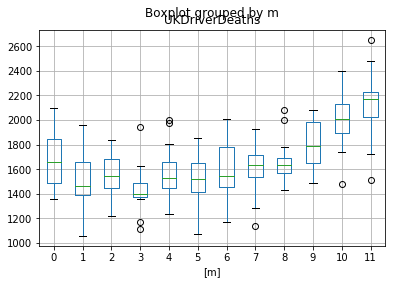

In [20]:
UKDriverDeaths[['m','UKDriverDeaths']].boxplot(by = 'm')

### sunspot

sunspot.month

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Monthly Sunspot Data, from 1749 to "Present"

### Description

Monthly numbers of sunspots, as from the World Data Center, aka SIDC. This is
the version of the data that will occasionally be updated when new counts
become available.

### Usage

    sunspot.month

### Format

The univariate time series `sunspot.year` and `sunspot.month` contain 289 and
2988 observations, respectively. The objects are of class `"ts"`.

### Author(s)

R

### Source

WDC-SILSO, Solar Influences Data Analysis Center (SIDC), Royal Observatory of
Belgium, Av. Circulaire, 3, B-1180 BRUSSELS Currently at
http://www.sidc.be/silso/datafiles

### See Also

`sunspot.month` is a longer version of `sunspots`; the latter runs until 1983
and is kept fixed (for reproducibility as example dataset).

### Examples

    require(stats); require(graphics)
    ## Compare the monthly series
    plot (sunspot.month,
       

,time,sunspot.month,m,y
1,1749.000000,58.0,0,1749
2,1749.083333,62.6,1,1749
3,1749.166667,70.0,2,1749
4,1749.250000,55.7,3,1749
5,1749.333333,85.0,4,1749


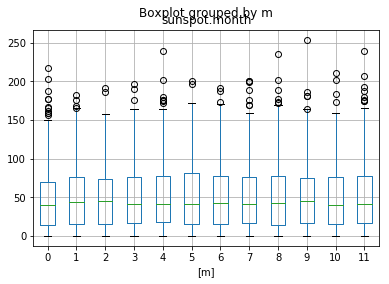

In [21]:
# float, integer
data('sunspot.month', show_doc=True)
sunspot = data('sunspot.month')
sunspot['m'] = round((sunspot['time'] % 1)*12).astype(np.int)
sunspot['y'] = sunspot['time'].astype(np.int)
display(sunspot.head())
sunspot[['m','sunspot.month']].boxplot(by = 'm')

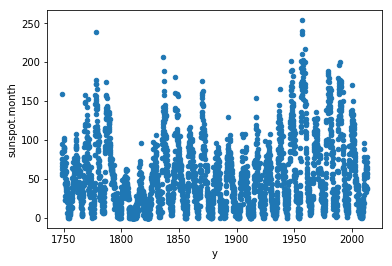

In [22]:
sunspot.plot.scatter(x = 'y',y = 'sunspot.month' )

### Iris

In [23]:
data('iris', show_doc=True)
iris = data('iris')
iris.head()

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### Boston Dataset

In [24]:
from sklearn.datasets import load_boston
boston = load_boston()

logger.info(boston.feature_names)
logger.info(boston.DESCR)
City = pd.DataFrame(boston.data, columns = boston.feature_names )
#City = City[['CRIM', 'INDUS','NOX','TAX','B']]
City_y = boston.target
logger.info(City.shape)
logger.info(City_y.shape)
logger.info(City.dtypes)
logger.info(City.columns)
logger.info(display(City.head()))

paso.2019-04-11.18:22:56.['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
paso.2019-04-11.18:22:56... _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
     

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


paso.2019-04-11.18:22:56.None


A dataset that illustrates the range of distributional behavior is the Boston Boston dataframe.  This dataframe includes 14 numerical variables that characterize 506 suburban housing tracts in the Boston area: 12 of these variables have class “numeric” and the remaining two have class “integer”.  

-  the distribution of crim is very asymmetric with an extremely heavy right tail;
- the distribution of lstat is also clearly asymmetric but far less so;
- the distribution of rm appears to be almost Gaussian; 
- the distribution of zn appears to be tri-modal, mostly concentrated around zero, but with clear secondary peaks at around 20 and 80.

### Housing Dataset

- Feature 0 (median income in a block) and feature 5 (number of households) of
the `California housing dataset
<http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html>`_ have very
different scales and contain some very large outliers. These two
characteristics lead to difficulties to visualize the data and, more
importantly, they can degrade the predictive performance of many machine
learning algorithms. Unscaled data can also slow down or even prevent the
convergence of many gradient-based estimators.
- Indeed many estimators are designed with the assumption that each feature takes
values close to zero or more importantly that all features vary on comparable
scales. In particular, metric-based and gradient-based estimators often assume
approximately standardized data (centered features with unit variances). A
notable exception are decision tree-based estimators that are robust to
arbitrary scaling of the data.

In [25]:
from sklearn.datasets import fetch_california_housing
print(__doc__)
dataset = fetch_california_housing()
logger.info(dataset.DESCR) 
Housing = pd.DataFrame(dataset.data, columns = dataset.feature_names)
Housing_y = dataset.target
#keeppers = ['MedInc', 'HouseAge', 'AveRooms'
#                   , 'AveBedrms', 'Population', 'AveOccup']
#Housing = Housing[keeppers]
logger.info(Housing.shape)
logger.info('Housing features:')
logger.info(Housing.dtypes)
logger.info('Housing target: HouseValue')
logger.info(Housing_y.shape)
logger.info(display(Housing.head()))

Automatically created module for IPython interactive environment
paso.2019-04-11.18:22:56... _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


paso.2019-04-11.18:22:56.None


### define df Internet traffic

In [26]:
dates =[
    '6/7/05 7:00',
'6/7/05 8:00',
'6/7/05 9:00',
'6/7/05 10:00',
'6/7/05 11:00',
'6/7/05 12:00',
'6/7/05 13:00',
'6/7/05 14:00',
'6/7/05 15:00',
'6/7/05 16:00',
'6/7/05 17:00',
'6/7/05 18:00',
'6/7/05 19:00',
'6/7/05 20:00',
'6/7/05 21:00',
'6/7/05 22:00',
'6/7/05 23:00',
'6/8/05 0:00',
'6/8/05 1:00',
'6/8/05 2:00',
'6/8/05 3:00',
'6/8/05 4:00',
'6/8/05 5:00',
'6/8/05 6:00',
'6/8/05 7:00',
'6/8/05 8:00',
'6/8/05 9:00',
'6/8/05 10:00',
'6/8/05 11:00',
'6/8/05 12:00',
'6/8/05 13:00',
'6/8/05 14:00',
'6/8/05 15:00',
'6/8/05 16:00',
'6/8/05 17:00',
'6/8/05 18:00',
'6/8/05 19:00',
'6/8/05 20:00',
'6/8/05 21:00',
'6/8/05 22:00',
'6/8/05 23:00',
'6/9/05 0:00',
'6/9/05 1:00',
'6/9/05 2:00',
'6/9/05 3:00',
'6/9/05 4:00',
'6/9/05 5:00',
'6/9/05 6:00',
'6/9/05 7:00',
'6/9/05 8:00',
'6/9/05 9:00',
'6/9/05 10:00',
'6/9/05 11:00',
'6/9/05 12:00',
'6/9/05 13:00',
'6/9/05 14:00',
'6/9/05 15:00',
'6/9/05 16:00',
'6/9/05 17:00'
]

bits = [
56718587433	,
76456162968	,
82534038485	,
88796995092	,
90247922345	,
90146117117	,
90457410673	,
89967660859	,
87211742250	,
73610634839	,
56695326238	,
48110601866	,
44406878766	,
43050199070	,
36961508495	,
31555022712	,
27467342825	,
25041832565	,
21160963384	,
19820358830	,
19088172849	,
23204098006	,
26290215100	,
42380697686	,
70062696507	,
80545779973	,
92844295517	,
96880965179	,
90932927706	,
91291134373	,
91713661478	,
90959467260	,
79385942062	,
62489604464	,
56243244765	,
50040519394	,
46874882633	,
41135776475	,
33502564447	,
28113068984	,
24938212968	,
21893717932	,
20344443618	,
19757922807	,
19588672617	,
21350728448	,
34965445638	,
58397356904	,
79198224742	,
89726734078	,
92701958472	,
89941544749	,
93225272251	,
93840519305	,
91765453742	,
84996841280	,
70779170417	,
53526087319	,
46784929778	
]

In [27]:
logger=get_paso_log('paso2222')
internet_traffic = pd.DataFrame(dates,columns=['date'])
internet_traffic['bit'] = bits
internet_traffic['byte'] = internet_traffic['bit']/8.
logger.info(internet_traffic.shape)
logger.info(display(internet_traffic.dtypes))
logger.info(display(internet_traffic.head()))

date     object
bit       int64
byte    float64
dtype: object

,date,bit,byte
0,6/7/05 7:00,56718587433,7.089823e+09
1,6/7/05 8:00,76456162968,9.557020e+09
2,6/7/05 9:00,82534038485,1.031675e+10
3,6/7/05 10:00,88796995092,1.109962e+10
4,6/7/05 11:00,90247922345,1.128099e+10


# toCategory  test

## toCategory  internet traffic

In [28]:
toCategory().transform(internet_traffic,objects=False).shape

paso.2019-04-11.18:22:56.toCategory integer feature converted : bit


(59, 3)

In [29]:
internet_traffic_tmp = internet_traffic.copy()
internet_traffic_tmp['date'] = pd.to_datetime(internet_traffic['date'])
toCategory().transform(internet_traffic_tmp,inplace=True).head()
internet_traffic.dtypes,internet_traffic_tmp.dtypes

paso.2019-04-11.18:22:56.toCategory integer feature converted : bit


(date     object
 bit       int64
 byte    float64
 dtype: object, date    datetime64[ns]
 bit           category
 byte           float64
 dtype: object)

## Categoryategory Housing

In [30]:
bh = pd.concat([Housing
           , Housing
           , Housing
           , Housing
           , Housing
          ], axis=0)
bh.shape

(103200, 8)

In [31]:
bbh = pd.concat([bh, bh
           , bh, bh
           , bh, bh
           , bh, bh
           , bh, bh
          ], axis=0)
print('Shape:{}'.format(bbh.shape))

Shape:(1032000, 8)


In [32]:
bbbh = pd.concat([bbh, bbh
           , bbh, bbh
           , bbh, bbh
           , bbh, bbh
           , bbh, bbh
          ], axis=0)
print('Shape:{}'.format(bbbh.shape))

Shape:(10320000, 8)


In [33]:
b4h = pd.concat([bbbh, bbbh
           , bbbh, bbbh
           , bbbh, bbbh
           , bbbh, bbbh
           , bbbh, bbbh
          ], axis=0)


print('Shape:{}'.format(b4h.shape))

Shape:(103200000, 8)


In [34]:
%timeit -r 3 toCategory(verbose=True).transform(Housing)

3.59 ms ± 50.3 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


For above shape requires the above time per call. Currently this is 1,000,000 x 8 columns requires 18 ms. Now turn off logging.

It appears logging adds 12\% to 15\%.

In [35]:
 %timeit -r 3 toCategory(verbose=False).transform(Housing)

3.61 ms ± 29.3 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [36]:
toCategory(verbose=False).transform(Housing,inplace=True)
Housing.shape

(20640, 8)

# toContinuousCategory  test

## define internet df again

In [37]:
dates =[
    '6/7/05 7:00',
'6/7/05 8:00',
'6/7/05 9:00',
'6/7/05 10:00',
'6/7/05 11:00',
'6/7/05 12:00',
'6/7/05 13:00',
'6/7/05 14:00',
'6/7/05 15:00',
'6/7/05 16:00',
'6/7/05 17:00',
'6/7/05 18:00',
'6/7/05 19:00',
'6/7/05 20:00',
'6/7/05 21:00',
'6/7/05 22:00',
'6/7/05 23:00',
'6/8/05 0:00',
'6/8/05 1:00',
'6/8/05 2:00',
'6/8/05 3:00',
'6/8/05 4:00',
'6/8/05 5:00',
'6/8/05 6:00',
'6/8/05 7:00',
'6/8/05 8:00',
'6/8/05 9:00',
'6/8/05 10:00',
'6/8/05 11:00',
'6/8/05 12:00',
'6/8/05 13:00',
'6/8/05 14:00',
'6/8/05 15:00',
'6/8/05 16:00',
'6/8/05 17:00',
'6/8/05 18:00',
'6/8/05 19:00',
'6/8/05 20:00',
'6/8/05 21:00',
'6/8/05 22:00',
'6/8/05 23:00',
'6/9/05 0:00',
'6/9/05 1:00',
'6/9/05 2:00',
'6/9/05 3:00',
'6/9/05 4:00',
'6/9/05 5:00',
'6/9/05 6:00',
'6/9/05 7:00',
'6/9/05 8:00',
'6/9/05 9:00',
'6/9/05 10:00',
'6/9/05 11:00',
'6/9/05 12:00',
'6/9/05 13:00',
'6/9/05 14:00',
'6/9/05 15:00',
'6/9/05 16:00',
'6/9/05 17:00'
]

bits = [
56718587433	,
76456162968	,
82534038485	,
88796995092	,
90247922345	,
90146117117	,
90457410673	,
89967660859	,
87211742250	,
73610634839	,
56695326238	,
48110601866	,
44406878766	,
43050199070	,
36961508495	,
31555022712	,
27467342825	,
25041832565	,
21160963384	,
19820358830	,
19088172849	,
23204098006	,
26290215100	,
42380697686	,
70062696507	,
80545779973	,
92844295517	,
96880965179	,
90932927706	,
91291134373	,
91713661478	,
90959467260	,
79385942062	,
62489604464	,
56243244765	,
50040519394	,
46874882633	,
41135776475	,
33502564447	,
28113068984	,
24938212968	,
21893717932	,
20344443618	,
19757922807	,
19588672617	,
21350728448	,
34965445638	,
58397356904	,
79198224742	,
89726734078	,
92701958472	,
89941544749	,
93225272251	,
93840519305	,
91765453742	,
84996841280	,
70779170417	,
53526087319	,
46784929778
]

internet_traffic = pd.DataFrame(dates, columns=['date'])
internet_traffic['bit'] = bits
internet_traffic['byte'] = internet_traffic['bit'] / 8.
df_internet_traffic=internet_traffic.copy()

## City

In [38]:
 g = ContinuoustoCategory()
(g.transform(df_internet_traffic,integer=False,floaty=False) == df_internet_traffic.astype('category')).all()

date    True
bit     True
byte    True
dtype: bool

In [39]:
City_tmp = City.copy()
(ContinuoustoCategory(verbose=True).transform(City_tmp,drop=True,inplace=True).columns ==\
['CRIM_qbin', 'ZN_qbin', 'INDUS_qbin', 'CHAS_qbin', 'NOX_qbin',
       'RM_qbin', 'AGE_qbin', 'DIS_qbin', 'RAD_qbin', 'TAX_qbin',
       'PTRATIO_qbin', 'B_qbin', 'LSTAT_qbin']).all()

paso.2019-04-11.18:23:05.ContinuoustoCategory : CRIM to CRIM_qbin
paso.2019-04-11.18:23:05.ContinuoustoCategory : ZN to ZN_qbin
paso.2019-04-11.18:23:05.ContinuoustoCategory : INDUS to INDUS_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : CHAS to CHAS_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : NOX to NOX_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : RM to RM_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : AGE to AGE_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : DIS to DIS_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : RAD to RAD_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : TAX to TAX_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : PTRATIO to PTRATIO_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : B to B_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : LSTAT to LSTAT_qbin


True

## show speedup of .cacheOn()

In [40]:
City_tmp = City.copy()
ContinuoustoCategory(verbose=True).transform(City_tmp,drop=False,inplace=True).iloc[:,0]
toCategory(verbose=True).transform(City_tmp,drop=True,inplace=True).head()

paso.2019-04-11.18:23:06.ContinuoustoCategory : CRIM to CRIM_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : ZN to ZN_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : INDUS to INDUS_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : CHAS to CHAS_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : NOX to NOX_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : RM to RM_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : AGE to AGE_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : DIS to DIS_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : RAD to RAD_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : TAX to TAX_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : PTRATIO to PTRATIO_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : B to B_qbin
paso.2019-04-11.18:23:06.ContinuoustoCategory : LSTAT to LSTAT_qbin


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,CHAS_qbin,NOX_qbin,RM_qbin,AGE_qbin,DIS_qbin,RAD_qbin,TAX_qbin,PTRATIO_qbin,B_qbin,LSTAT_qbin
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,"(-0.001, 1.0]","(0.532, 0.538]","(6.572, 6.601]","(64.69, 65.4]","(4.023, 4.091]","(0.999, 2.0]","(294.65, 296.0]","(15.2, 15.575]","(396.402, 396.9]","(4.976, 5.113]"
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,"(-0.001, 1.0]","(0.464, 0.472]","(6.417, 6.427]","(78.52, 79.76]","(4.931, 5.112]","(0.999, 2.0]","(233.0, 242.0]","(17.6, 17.8]","(396.402, 396.9]","(9.134, 9.289]"
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,"(-0.001, 1.0]","(0.464, 0.472]","(7.152, 7.195]","(59.58, 61.485]","(4.931, 5.112]","(0.999, 2.0]","(233.0, 242.0]","(17.6, 17.8]","(392.78, 392.882]","(3.929, 4.147]"
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,"(-0.001, 1.0]","(0.453, 0.458]","(6.981, 7.019]","(45.025, 45.8]","(5.892, 6.062]","(2.0, 3.0]","(216.0, 222.0]","(18.6, 18.7]","(394.462, 394.64]","(2.883, 3.02]"
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,"(-0.001, 1.0]","(0.453, 0.458]","(7.095, 7.152]","(54.12, 56.065]","(5.892, 6.062]","(2.0, 3.0]","(216.0, 222.0]","(18.6, 18.7]","(396.402, 396.9]","(5.287, 5.465]"


In [41]:
City_tmp = City.copy()
%timeit ContinuoustoCategory(verbose=False).transform(City_tmp,drop=False,inplace=False)
%timeit toCategory(verbose=False).transform(City_tmp,drop=True,inplace=False).head()

135 ms ± 754 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.44 ms ± 36.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
City_tmp = City.copy()
g = ContinuoustoCategory(verbose=False).cacheOn()
g.transform(City_tmp,drop=True,inplace=False)
%timeit g.transform(City_tmp,drop=False,inplace=True)
h = toCategory(verbose=False).cacheOn()
%timeit h.transform(City_tmp,drop=True,inplace=True)

1.83 µs ± 4.36 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.84 µs ± 33 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [43]:
cache_speedup = 128/1.96 *1000
print('ContinuoustoCategory feature conversion speedup factor:{}',format(cache_speedup//1))
cache_speedup = 3.6/1.93 * 1000
print('toCaterogy no feature conversion speedup factor:{}',format(cache_speedup//1))

ContinuoustoCategory feature conversion speedup factor:{} 65306.0
toCaterogy no feature conversion speedup factor:{} 1865.0


## Housing

In [44]:
nredf = list(ContinuoustoCategory(verbose=True).transform(Housing,quantile_bins=False,nbins=10,drop=False,inplace=False))
len(nredf)

paso.2019-04-11.18:23:50.ContinuoustoCategory : MedInc to MedInc_bin
paso.2019-04-11.18:23:50.ContinuoustoCategory : HouseAge to HouseAge_bin
paso.2019-04-11.18:23:50.ContinuoustoCategory : AveRooms to AveRooms_bin
paso.2019-04-11.18:23:50.ContinuoustoCategory : AveBedrms to AveBedrms_bin
paso.2019-04-11.18:23:50.ContinuoustoCategory : Population to Population_bin
paso.2019-04-11.18:23:50.ContinuoustoCategory : AveOccup to AveOccup_bin
paso.2019-04-11.18:23:50.ContinuoustoCategory : Latitude to Latitude_bin
paso.2019-04-11.18:23:50.ContinuoustoCategory : Longitude to Longitude_bin


16

# DateTimeComponents

## define datetime data

In [45]:
def df_small():
    df = pd.DataFrame({
        'datetime_S_column': ['11/11/1906', '11/11/1906', '11/11/1906 12:13:14', '11/11/1906', '11/11/1906'],
        'datetime_NY_column': ['11/11/1906', '11/11/1907', '11/11/1908', '11/11/1909', '11/11/1910'],
        'datetime_ND_column': ['11/11/1906', '11/12/1907', '11/13/1908', '11/14/1909', '11/15/1910'],
        'datetime_NA_column': ['11/11/1906', np.nan, '11/11/1908', '11/11/1909', '11/11/1910'],
        'datetime_EU_column': ['21.01.1906', '21.11.1907', '14.11.1908', '13.11.1909', '11.10.1910'],
        'obj_column': ['red', 'blue', 'green', 'pink', np.nan],
        'booly': [True, False, True, False, True],
        'integer': [1, 2, 33, 44, 34],
        'float': [1., 2., 35., 46, .37]
            })
    return (df)

def df_small_no_NAf(df_small):
    return (df_small().replace(to_replace=np.nan, value='11/11/1906'))

df_small_no_NA = df_small_no_NAf(df_small)
df_small_no_NA.dtypes

datetime_S_column      object
datetime_NY_column     object
datetime_ND_column     object
datetime_NA_column     object
datetime_EU_column     object
obj_column             object
booly                    bool
integer                 int64
float                 float64
dtype: object

## toDatetimeComponents(verbose=True)
- .transform(dt,drop=True,inplace=True)



In [46]:
g = toDatetimeComponents(verbose=True)
dt = df_small_no_NA.copy()
for feature in dt.columns[0:6]:
    dt[feature] = pd.to_datetime(dt[feature]
                                 , exact=True
                                 , errors ='ignore'
                                 , infer_datetime_format=True) 

display(dt.dtypes)
display(g.transform(dt,drop=True,inplace=True).shape[1])
DataFrameSummary(dt).summary()

datetime_S_column     datetime64[ns]
datetime_NY_column    datetime64[ns]
datetime_ND_column    datetime64[ns]
datetime_NA_column    datetime64[ns]
datetime_EU_column    datetime64[ns]
obj_column                    object
booly                           bool
integer                        int64
float                        float64
dtype: object

paso.2019-04-11.18:23:50.datetime feature component added: datetime_S_column_Year
paso.2019-04-11.18:23:50.datetime feature component added: datetime_S_column_Month
paso.2019-04-11.18:23:50.datetime feature component added: datetime_S_column_Week
paso.2019-04-11.18:23:50.datetime feature component added: datetime_S_column_Day
paso.2019-04-11.18:23:50.datetime feature component added: datetime_S_column_Dayofweek
paso.2019-04-11.18:23:50.datetime feature component added: datetime_S_column_Dayofyear
paso.2019-04-11.18:23:50.datetime feature component added: datetime_S_column_Elapsed
paso.2019-04-11.18:23:50.datetime feature component added: datetime_S_column_Is_month_end
paso.2019-04-11.18:23:50.datetime feature component added: datetime_S_column_Is_month_start
paso.2019-04-11.18:23:50.datetime feature component added: datetime_S_column_Is_quarter_end
paso.2019-04-11.18:23:50.datetime feature component added: datetime_S_column_Is_quarter_start
paso.2019-04-11.18:23:50.datetime feature com

69

,obj_column,booly,integer,float,datetime_S_column_Year,datetime_S_column_Month,datetime_S_column_Week,datetime_S_column_Day,datetime_S_column_Dayofweek,datetime_S_column_Dayofyear,...,datetime_EU_column_Day,datetime_EU_column_Dayofweek,datetime_EU_column_Dayofyear,datetime_EU_column_Elapsed,datetime_EU_column_Is_month_end,datetime_EU_column_Is_month_start,datetime_EU_column_Is_quarter_end,datetime_EU_column_Is_quarter_start,datetime_EU_column_Is_year_end,datetime_EU_column_Is_year_start
count,NaN,NaN,5,5,5,5,5,5,5,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,22.8,16.874,1906,11,45,11,6,315,...,16,4,253.2,-1.93479e+09,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,19.9173,21.923,0,0,0,0,0,0,...,4.69042,2,130.787,5.76553e+07,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1,0.37,1906,11,45,11,6,315,...,11,1,21,-2.01796e+09,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2,1,1906,11,45,11,6,315,...,13,3,284,-1.96016e+09,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,33,2,1906,11,45,11,6,315,...,14,5,317,-1.92914e+09,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,34,35,1906,11,45,11,6,315,...,21,5,319,-1.89769e+09,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,44,46,1906,11,45,11,6,315,...,21,6,325,-1.869e+09,NaN,NaN,NaN,NaN,NaN,NaN
counts,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
uniques,5,2,5,5,1,1,1,1,1,1,...,4,4,5,5,1,1,1,1,1,1


## timeit with cache

In [47]:
g = toDatetimeComponents(verbose=False)
dt = df_small_no_NA.copy()
for feature in dt.columns[0:6]:
    dt[feature] = pd.to_datetime(dt[feature]
                                 , exact=True
                                 , errors ='ignore'
                                 , infer_datetime_format=True) 

%timeit g.transform(dt,drop=True,inplace=False)

60.8 ms ± 742 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
g = toDatetimeComponents(verbose=False).cacheOn()
dt = df_small_no_NA.copy()
for feature in dt.columns[0:6]:
    dt[feature] = pd.to_datetime(dt[feature]
                                 , exact=True
                                 , errors ='ignore'
                                 , infer_datetime_format=True) 

%timeit g.transform(dt,drop=True,inplace=False)

1.82 µs ± 29.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [49]:
63.7e03/1.92

33177.083333333336


approximately 33,000x faster with cacheOn

## read/wrire

This will make this **paso** save the transform of ``f(x):x``, that once it's been computed once, it can later just read from permanent storage.

In [50]:
g = toDatetimeComponents(verbose=False).cacheOn()
dt = df_small_no_NA.copy()
for feature in dt.columns[0:6]:
    dt[feature] = pd.to_datetime(dt[feature]
                                 , exact=True
                                 , errors ='ignore'
                                 , infer_datetime_format=True) 
g.transform(dt,drop=True,inplace=True)
g.write('tmp/dt')
DataFrameSummary(dt).summary()

,obj_column,booly,integer,float,datetime_S_column_Year,datetime_S_column_Month,datetime_S_column_Week,datetime_S_column_Day,datetime_S_column_Dayofweek,datetime_S_column_Dayofyear,...,datetime_EU_column_Day,datetime_EU_column_Dayofweek,datetime_EU_column_Dayofyear,datetime_EU_column_Elapsed,datetime_EU_column_Is_month_end,datetime_EU_column_Is_month_start,datetime_EU_column_Is_quarter_end,datetime_EU_column_Is_quarter_start,datetime_EU_column_Is_year_end,datetime_EU_column_Is_year_start
count,NaN,NaN,5,5,5,5,5,5,5,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,22.8,16.874,1906,11,45,11,6,315,...,16,4,253.2,-1.93479e+09,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,19.9173,21.923,0,0,0,0,0,0,...,4.69042,2,130.787,5.76553e+07,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1,0.37,1906,11,45,11,6,315,...,11,1,21,-2.01796e+09,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2,1,1906,11,45,11,6,315,...,13,3,284,-1.96016e+09,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,33,2,1906,11,45,11,6,315,...,14,5,317,-1.92914e+09,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,34,35,1906,11,45,11,6,315,...,21,5,319,-1.89769e+09,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,44,46,1906,11,45,11,6,315,...,21,6,325,-1.869e+09,NaN,NaN,NaN,NaN,NaN,NaN
counts,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
uniques,5,2,5,5,1,1,1,1,1,1,...,4,4,5,5,1,1,1,1,1,1


In [51]:
dt2 = g.read()
DataFrameSummary(dt2).summary()

,obj_column,booly,integer,float,datetime_S_column_Year,datetime_S_column_Month,datetime_S_column_Week,datetime_S_column_Day,datetime_S_column_Dayofweek,datetime_S_column_Dayofyear,...,datetime_EU_column_Day,datetime_EU_column_Dayofweek,datetime_EU_column_Dayofyear,datetime_EU_column_Elapsed,datetime_EU_column_Is_month_end,datetime_EU_column_Is_month_start,datetime_EU_column_Is_quarter_end,datetime_EU_column_Is_quarter_start,datetime_EU_column_Is_year_end,datetime_EU_column_Is_year_start
count,NaN,NaN,5,5,5,5,5,5,5,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,22.8,16.874,1906,11,45,11,6,315,...,16,4,253.2,-1.93479e+09,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,19.9173,21.923,0,0,0,0,0,0,...,4.69042,2,130.787,5.76553e+07,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1,0.37,1906,11,45,11,6,315,...,11,1,21,-2.01796e+09,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2,1,1906,11,45,11,6,315,...,13,3,284,-1.96016e+09,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,33,2,1906,11,45,11,6,315,...,14,5,317,-1.92914e+09,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,34,35,1906,11,45,11,6,315,...,21,5,319,-1.89769e+09,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,44,46,1906,11,45,11,6,315,...,21,6,325,-1.869e+09,NaN,NaN,NaN,NaN,NaN,NaN
counts,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
uniques,5,2,5,5,1,1,1,1,1,1,...,4,4,5,5,1,1,1,1,1,1


# DateTimetoCatergory

# EliminateUnviableFeatures

In [52]:
def X():
    return np.array([
            [4.2, 3.7, 8.9],
            [3.1, 3.2, 0.5],
            [1.4, 0.9, 8.9],
            [5.8, 5.0, 2.4],
            [5.6, 7.8, 2.4],
            [0.1, 7.0, 0.2],
            [8.3, 1.9, 7.8],
            [3.8, 9.2, 2.8],
            [5.3, 5.7, 4.5],
            [6.8, 5.3, 3.2]
        ])

In [53]:
def cn():
    return ['integer_0','float_1','float_2']
def df_typeNA():
    return ((pd.DataFrame(X(), columns=[cn()])).replace(to_replace=5, value=np.nan))

In [54]:
g = EliminateUnviableFeatures()
try: g.transform(df_typeNA())
except:print('exception rose. as it should.')

exception rose. as it should.


In [55]:
def df_type():
    return pd.DataFrame(X(), columns=[cn()])

def df_typeDup():
    df =  pd.DataFrame(X(), columns=[cn()])
    df['float_1'] = df['float_2'].values
    return(df)

def cno():
    return ['integer_10', 'float_11', 'float_12']

def df_typeo():
    return pd.DataFrame(X(), columns=[cno()])

In [56]:
g = EliminateUnviableFeatures()
g.transform(df_type(), Yarg=df_type(),inplace=True)

paso.2019-04-11.18:24:12.NOT** _Eliminate_Low_Variance_Features Before len lt 10 ('integer_0',)
paso.2019-04-11.18:24:12.NOT** _Eliminate_Low_Variance_Features Before len lt 10 ('float_1',)
paso.2019-04-11.18:24:12.NOT** _Eliminate_Low_Variance_Features Before len lt 10 ('float_2',)
paso.2019-04-11.18:24:12._Eliminate_Duplicate_Features []
paso.2019-04-11.18:24:12.NOT** _Eliminate_Low_Variance_Features Before len lt 10 ('integer_0',)
paso.2019-04-11.18:24:12.NOT** _Eliminate_Low_Variance_Features Before len lt 10 ('float_1',)
paso.2019-04-11.18:24:12.NOT** _Eliminate_Low_Variance_Features Before len lt 10 ('float_2',)
paso.2019-04-11.18:24:12._Eliminate_Duplicate_Features []


,integer_0,float_1,float_2
0,4.2,3.7,8.9
2,1.4,0.9,8.9
3,5.8,5.0,2.4
4,5.6,7.8,2.4
5,0.1,7.0,0.2
6,8.3,1.9,7.8
7,3.8,9.2,2.8
8,5.3,5.7,4.5
9,6.8,5.3,3.2


In [57]:
g = EliminateUnviableFeatures()
g.transform(df_type(), Yarg=City)

paso.2019-04-11.18:24:12.NOT** _Eliminate_Low_Variance_Features Before len lt 10 ('integer_0',)
paso.2019-04-11.18:24:12.NOT** _Eliminate_Low_Variance_Features Before len lt 10 ('float_1',)
paso.2019-04-11.18:24:12.NOT** _Eliminate_Low_Variance_Features Before len lt 10 ('float_2',)
paso.2019-04-11.18:24:12._Eliminate_Duplicate_Features []
paso.2019-04-11.18:24:12._Eliminate_Duplicate_Features []
paso.2019-04-11.18:24:12._Eliminate_Features_not_found_in_TEST: [('float_2',), ('integer_0',), ('float_1',)]
paso.2019-04-11.18:24:12._Eliminate_Features_not_found_in_TRAIN ['DIS', 'INDUS', 'AGE', 'B', 'RM', 'TAX', 'PTRATIO', 'CHAS', 'NOX', 'RAD', 'CRIM', 'ZN', 'LSTAT']


0
2
3
4
5
6
7
8
9


# Scale

In [58]:
import multiprocessing
multiprocessing.cpu_count()

24

# Dask

In [59]:
import dask.dataframe as pdd
import multiprocessing as mp

In [60]:
#import graphviz
#b4hd.visualize()

True

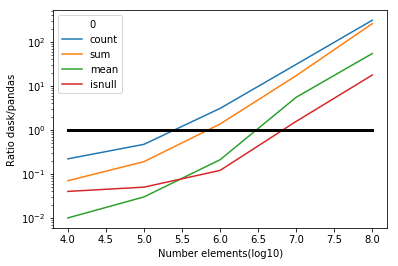

In [61]:
df = dask_pandas_ratio()
df.loc[0,0] == 'count'

For highly parallel operations, with a threadcount = 24, then choose dask when the number of elements is greater than 1.0e06. For not very parallel operations, with a threadcount = 24, then choose dask when the number of elements is greater than 1.0e07.  Ignore isnull() as outlier because very fast for pandas.

in general about 10x faster or more when using dask on dataframes with more than 1.0e07 elements.

# Scale

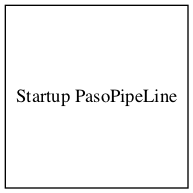

In [62]:
from paso.pre.scale import scaler
g = scaler('LambertScaler')
g.train(City) == g
Pipe.display_DAG()

## _select_type

In [63]:
def _select_type(X,dtype_):
        if X.ndim == 1:  #series or 1-feature array
            print(X.dtypes)
            if X.dtypes ==  dtype_:
                return X
            else: return pd.DataFrame()  # not dtype_, return empty DataFrame
        elif X.shape[1] <= 0:
            raise TypeError('toDatetimeComponents:length le 0. {}'.fornat(str(X.shape[1])))
        else:
            Z = X.select_dtypes(include=[dtype_])
            return Z

### create some test df's

In [64]:
df = pd.DataFrame([
    ['a1', 'b', 'c1'],
    ['a2', 'b', 'c2'],
    ['a3', 'b', 'c3'],
    ['a4', 'b', 'c4'],
    ['a5', 'b', 'c5'],
    ['a6', 'b', 'c6'],
    ['a7', 'b', 'c7'],
    ['a8', 'b', 'c8'],
    ['a9', 'b', 'c9'],
    ['a0', 'b', 'c01'],
    ['a01', 'b', 'c02'],
    ['a02', 'b', 'c03']
])
df.dtypes

0    object
1    object
2    object
dtype: object

In [65]:
df2 = pd.DataFrame([
    ['a1', True, 1],
    ['a2', False, 2],
    ['a3', False, 3],
    ['a4', True, 4],
    ['a5', True, 5],
    ['a6', True, 6],
    ['a7', False, 7],
    ['a8', True, 8],
    ['a9', False, 9],
    ['a0', True, 1],
    ['a01', False, 2],
    ['a02', False, 3]
])
df2.dtypes

0    object
1      bool
2     int64
dtype: object

### test object conversion

In [66]:
g = toCategory()
g.transform(df,integer=False,boolean=False,objects=False).dtypes

0    object
1    object
2    object
dtype: object

In [67]:
g = toCategory()
g.transform(df,integer=False,boolean=False,objects=True).dtypes

paso.2019-04-11.18:25:00.toCategory object(str) feature converted : 0
paso.2019-04-11.18:25:00.toCategory object(str) feature converted : 1
paso.2019-04-11.18:25:00.toCategory object(str) feature converted : 2


0    category
1    category
2    category
dtype: object

### test float conversion to category

In [68]:
g = toCategory()
z=  g.transform(iris)
display(iris.dtypes)
z.dtypes;z.head(3)

paso.2019-04-11.18:25:00.toCategory object(str) feature converted : Species


Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### test object,boolean.integer conversion to category

In [69]:
g = toCategory()
z=  g.transform(df2)
display(df2.dtypes)
z.dtypes

paso.2019-04-11.18:25:00.toCategory object(str) feature converted : 0
paso.2019-04-11.18:25:00.toCategory boolean feature converted : 1
paso.2019-04-11.18:25:00.toCategory integer feature converted : 2


0    object
1      bool
2     int64
dtype: object

0    category
1    category
2    category
dtype: object

### test datetime conversion to category

In [70]:
g = toCategory()

df_internet_traffic =internet_traffic.copy()
DT_internet_traffic = df_internet_traffic.copy()
DT_internet_traffic['date'] = pd.to_datetime(df_internet_traffic['date'])
z=  g.transform(DT_internet_traffic)
display(DT_internet_traffic.head(3))
z.head(3)

paso.2019-04-11.18:25:00.toCategory integer feature converted : bit


,date,bit,byte
0,2005-06-07 07:00:00,56718587433,7.089823e+09
1,2005-06-07 08:00:00,76456162968,9.557020e+09
2,2005-06-07 09:00:00,82534038485,1.031675e+10


,date,bit,byte
0,2005-06-07 07:00:00,56718587433,7.089823e+09
1,2005-06-07 08:00:00,76456162968,9.557020e+09
2,2005-06-07 09:00:00,82534038485,1.031675e+10


# Create Train,valid,test

First carve out 30% as test.leaving 70% of dataset as train. Since target has more Negative (WDBC-Benign) than Positive (WDBC-Malignant), stratify is used. Later on show imbalance paso.

Secondly, carve out 20% of remaining train dataset as validation, leaving 56% of dataset as train. 

In [71]:
X, Z, X_target, Z_target = train_test_split( City[City.columns.difference(['CRIM'])]
                                              ,  City['CRIM']
                                              , test_size=0.3
                   #                           , stratify=City['CRIM']
                                              , random_state=77)

X.shape,X_target.shape, Z.shape,  Z_target.shape

((354, 12), (354,), (152, 12), (152,))

In [72]:
X, Y, X_target, Y_target = train_test_split( X,X_target
                                              , test_size=0.2
                                              , random_state=77)
X.shape,X_target.shape, Y.shape,  Y_target.shape, Z.shape,  Z_target.shape

((283, 12), (283,), (71, 12), (71,), (152, 12), (152,))